In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mammographic-mass-data-set/Cleaned_data.csv


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [4]:
df_train = pd.read_csv('/kaggle/input/mammographic-mass-data-set/Cleaned_data.csv', index_col=0)

In [5]:
df_train.head()

,Age,Shape,Margin,Density,Severity
BI-RADS,,,,,
5,67,3,5,3,1
5,58,4,5,3,1
4,28,1,1,3,0
5,57,1,5,3,1
5,76,1,4,3,1


In [6]:
df_train.shape

(830, 5)

In [7]:
df_train.isnull().sum()

Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [8]:
df_train.reset_index(inplace=True)

In [9]:
df_train.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [10]:
df_train.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

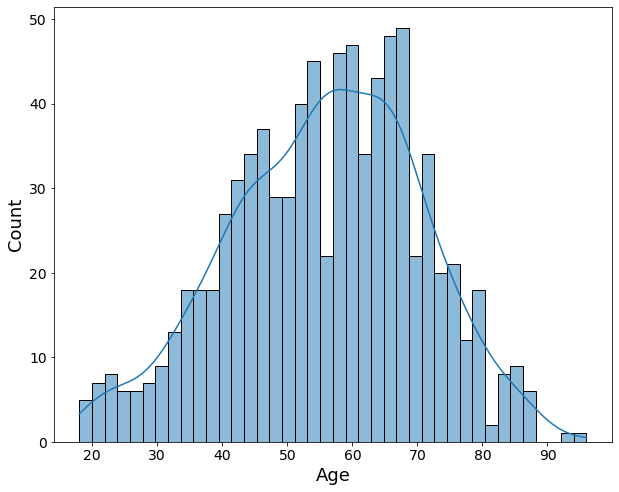

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot frequency plot/ histogram

sns.histplot(x="Age", kde=True, data=df_train, ax=axes, bins=40);
axes.set(xlabel="Age");
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

<AxesSubplot:xlabel='Age'>

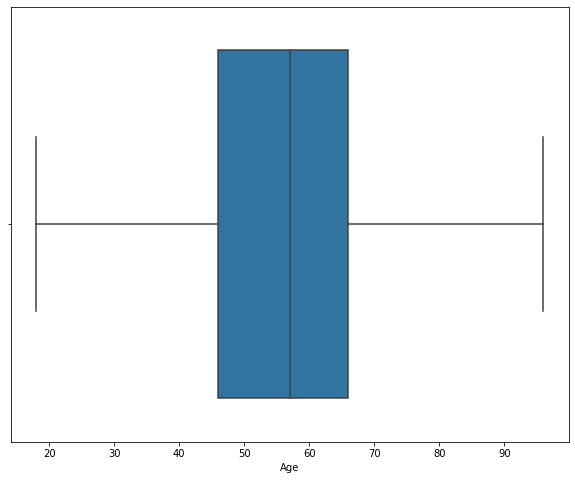

In [12]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x='Age', data=df_train)

In [13]:
df_train['BI-RADS'].value_counts()

4     468
5     316
3      24
6       9
2       7
0       5
55      1
Name: BI-RADS, dtype: int64

In [14]:
df_train['BI-RADS'][df_train[df_train['BI-RADS'] == 55].index] = 5

In [15]:
df_train.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.333735,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.688134,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,6.000000,96.000000,4.000000,5.000000,4.000000,1.000000


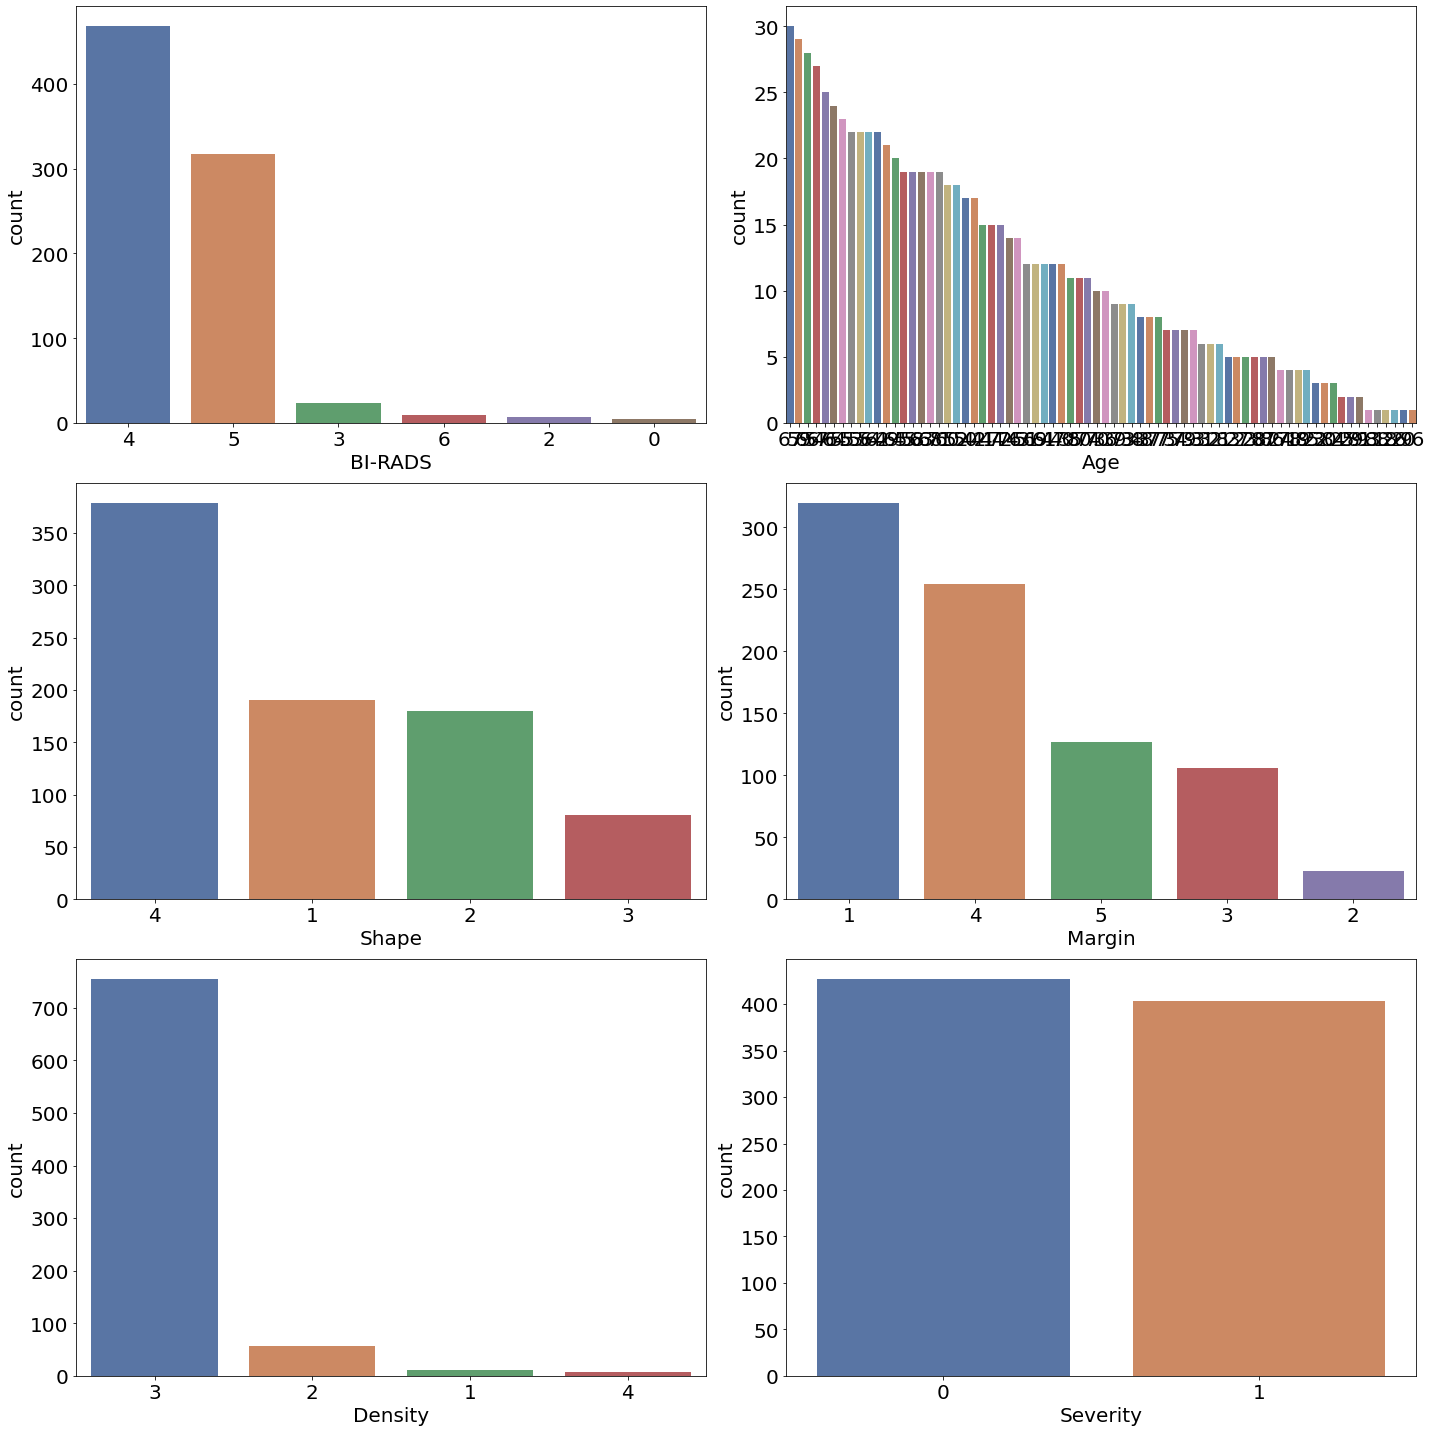

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20));
for variable, subplot in zip(df_train.columns, ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=df_train[variable], ax=subplot, palette='deep', order =
    df_train[variable].value_counts().index);
plt.tight_layout()

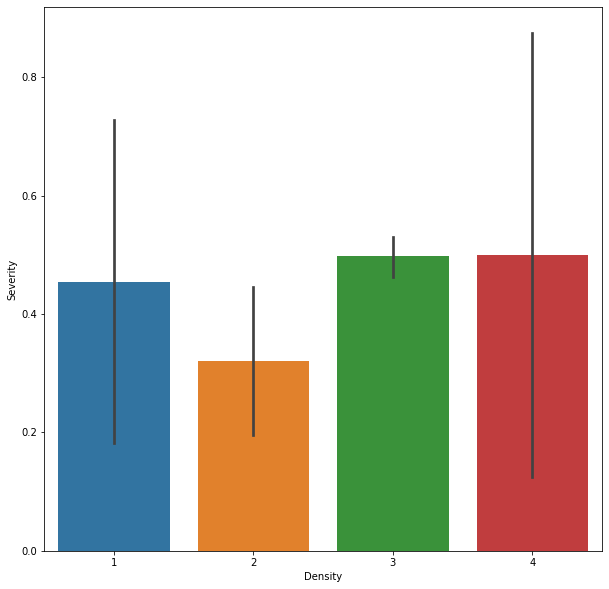

In [17]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Density')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

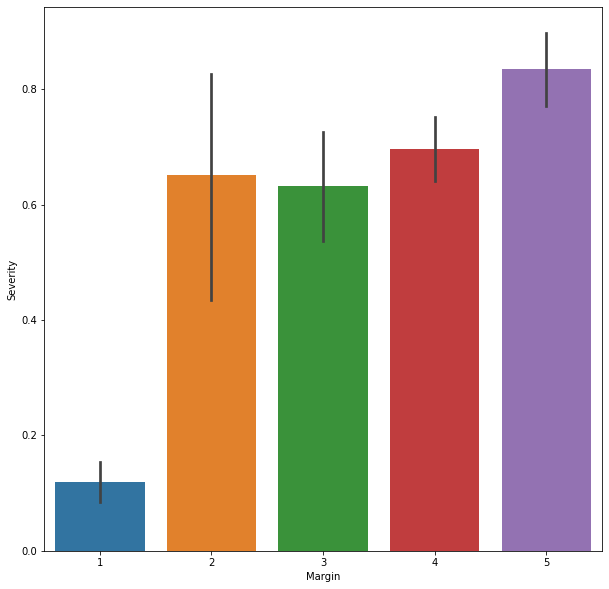

In [18]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Margin')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

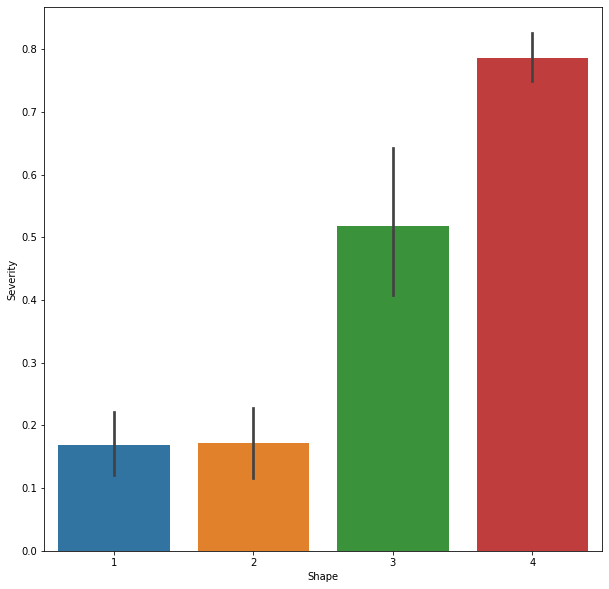

In [19]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=df_train, y = 'Severity', x='Shape')
subplot.xaxis.label.set_size(20)
subplot.yaxis.label.set_size(20)
subplot.tick_params('y', labelsize = 20);
subplot.tick_params('x', labelsize = 20);

<AxesSubplot:>

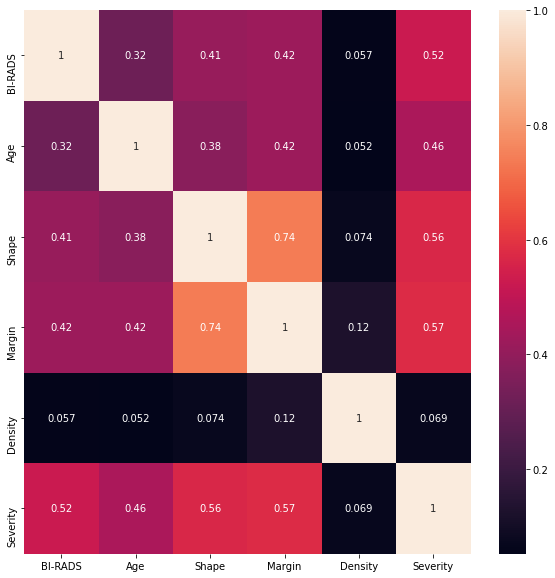

In [20]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

In [21]:
df_train.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


In [22]:
X = df_train.drop(columns=['Severity'],axis=1)
y = df_train['Severity']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [96]:
clf_dtc = DecisionTreeClassifier(random_state= 42)
clf_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [97]:
y_pred = clf_dtc.predict(X_test)
accuracy_score(y_pred, y_test)

0.7771084337349398

In [98]:
clf_svc = SVC(C = 1.0, kernel = 'linear')
clf_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [99]:
y_pred = clf_svc.predict(X_test)
accuracy_score(y_pred, y_test)

0.8012048192771084

In [100]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [101]:
y_pred = clf_lr.predict(X_test)
accuracy_score(y_pred, y_test)

0.7951807228915663

In [102]:
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=10)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [103]:
y_pred = clf_knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.8012048192771084

In [104]:
clf_rfc = RandomForestClassifier(n_estimators=2)
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [105]:
y_pred = clf_rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.7530120481927711

In [107]:
score = cross_val_score(clf_svc, X, y, cv = 10)
score.mean()

0.8240963855421686

0.8

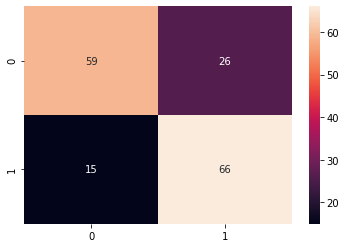

In [109]:
sns.heatmap(confusion_matrix(clf_rfc.predict(X_test), y_test),annot=True)
f1_score(clf_svc.predict(X_test), y_test)